# Bike Sharing Case study

## Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

*  Which variables are significant in predicting the demand for shared bikes.
*  How well those variables describe the bike demands

In [199]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading and understanding the dataset

In [201]:
# Importing the datsset
bike_df=pd.read_csv('day.csv')

In [202]:
# Taking a look at the dataset
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [203]:
# Looking at the columns of the dataset
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [204]:
# Rows and columns of the dataset
bike_df.shape

(730, 16)

In [205]:
# Investigating the null values and the types of data
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [206]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [207]:
# checking on the null counts of the data
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [208]:
# Lets rename the columns into proper name
bike_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [209]:
bike_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


This dataset has 730 rows and 16 columns combining numerical and categorical rows. It has no null values.

### Dropping the columns that are not helpful for the analysis
* Instant gives only index number which will not give any meaningful insight
* We already have information regarding month, year and weekday in other columns. So dteday column is removed.
* Casual + registered = Cnt which describes a target variable. So lets drop those 2 columns

In [212]:
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [213]:
bike_df.shape

(730, 12)

In [214]:
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [215]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Visualizing the dataset

<Figure size 1500x3000 with 0 Axes>

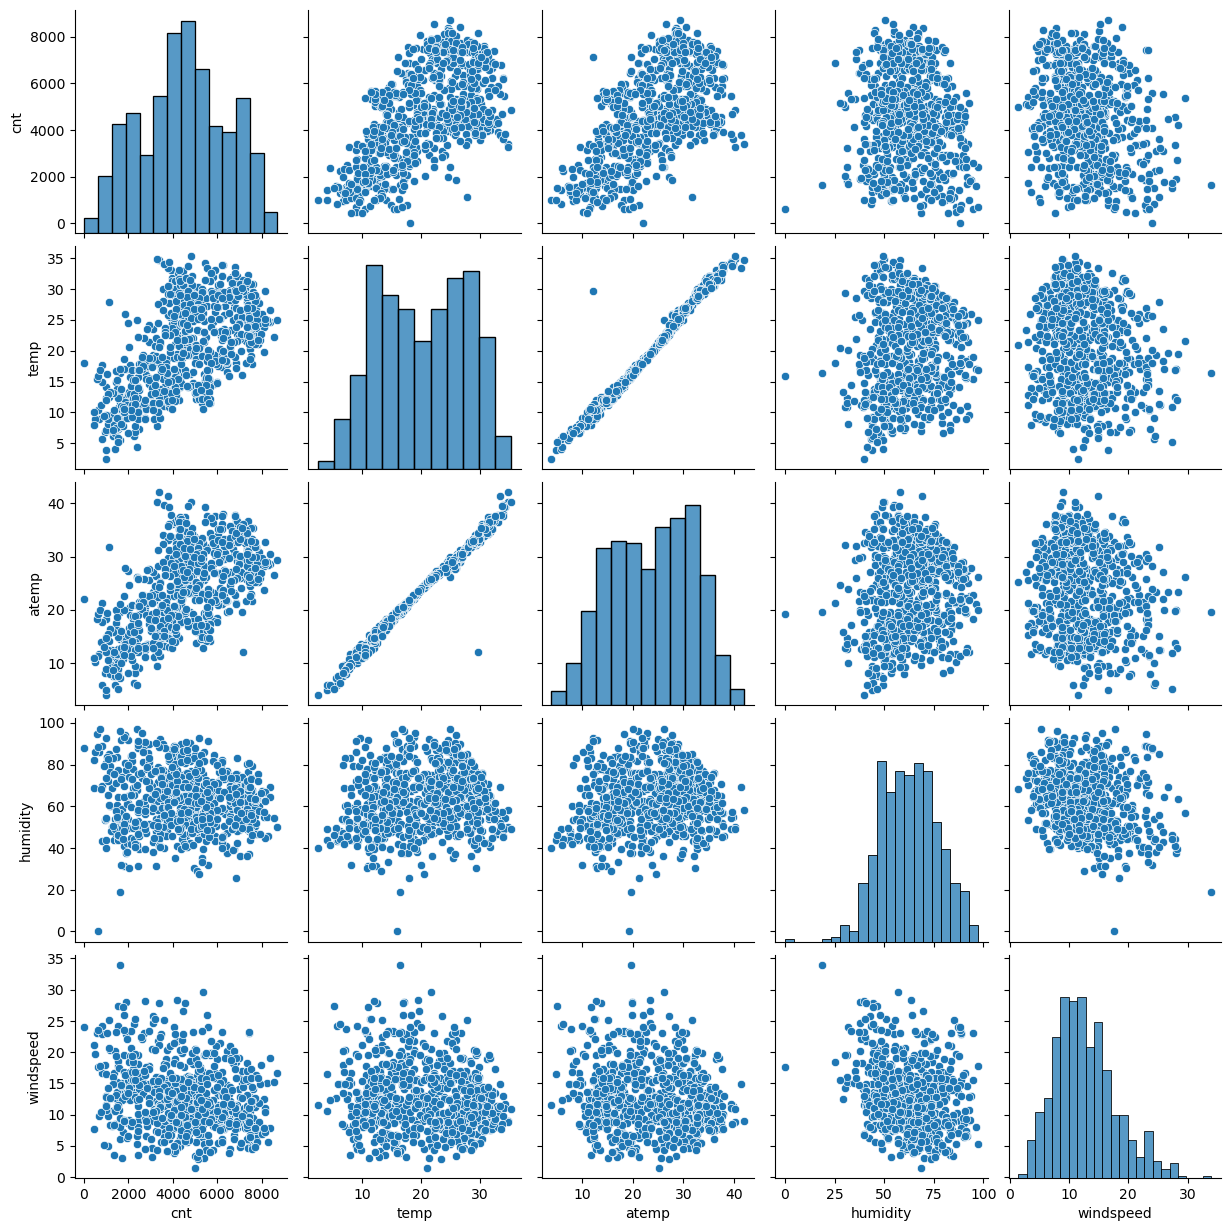

In [217]:
# Plotting pair plot to visualize the linear relationship between nemuerical variables

plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

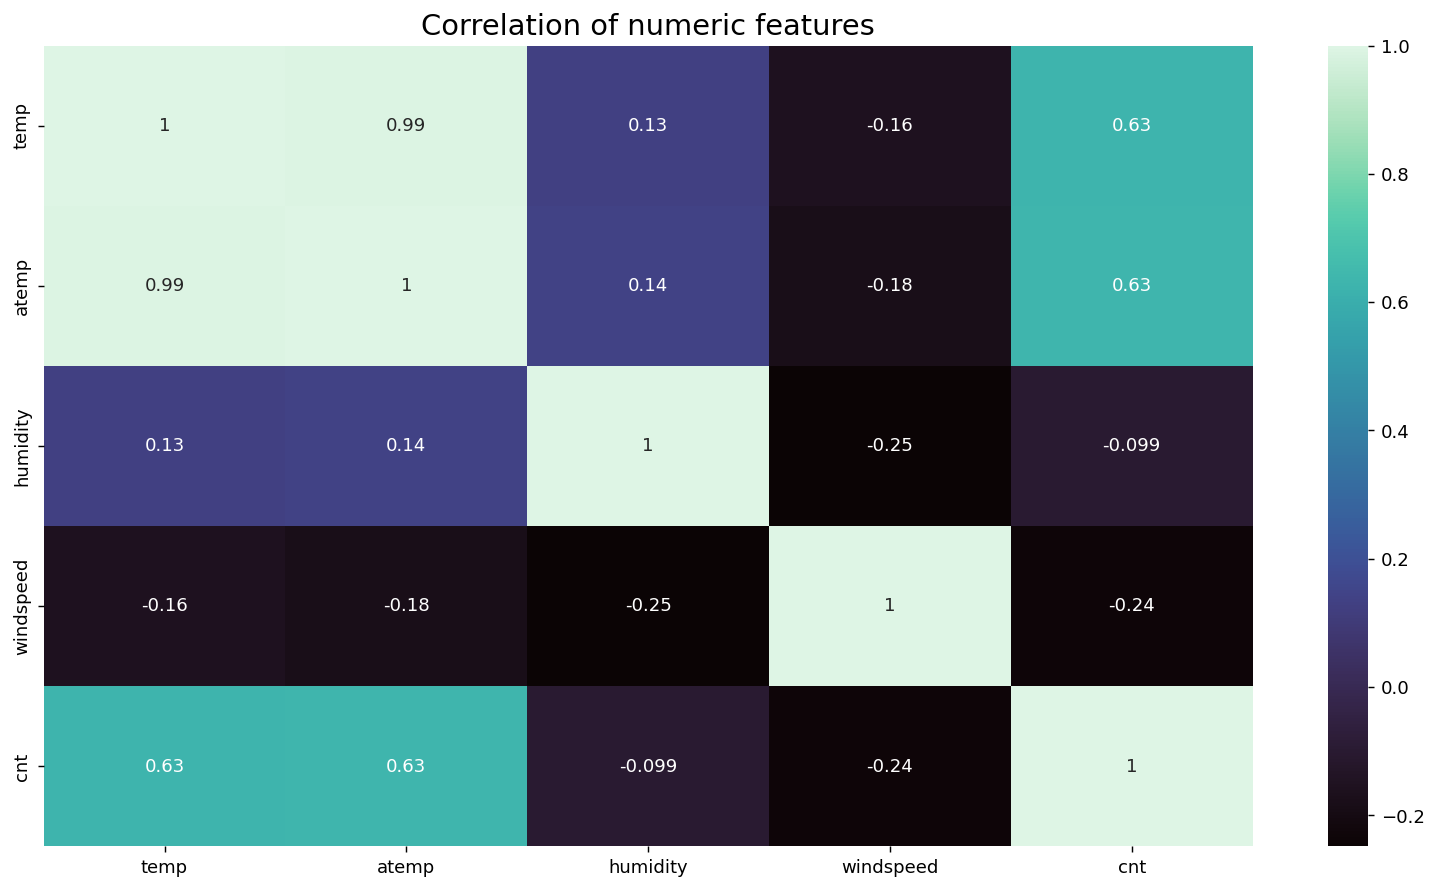

In [218]:
num_col = ["temp","atemp","humidity","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bike_df[num_col].corr(),annot= True,cmap="mako")
plt.show()

It can be seen from the above plot and the heat map that atemp and temp columns are correlated with target variable. Also atemp and temp are strongly correlated with each other. Hence liner model can be constructed for the above data since it shows some correlation with some independent variables. Any one of those 2 variables can be dropped for the analysis.

In [220]:
# Lets map the numbers of each categorical columns with a meaningful name

bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df.month = bike_df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snow'})


In [221]:
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


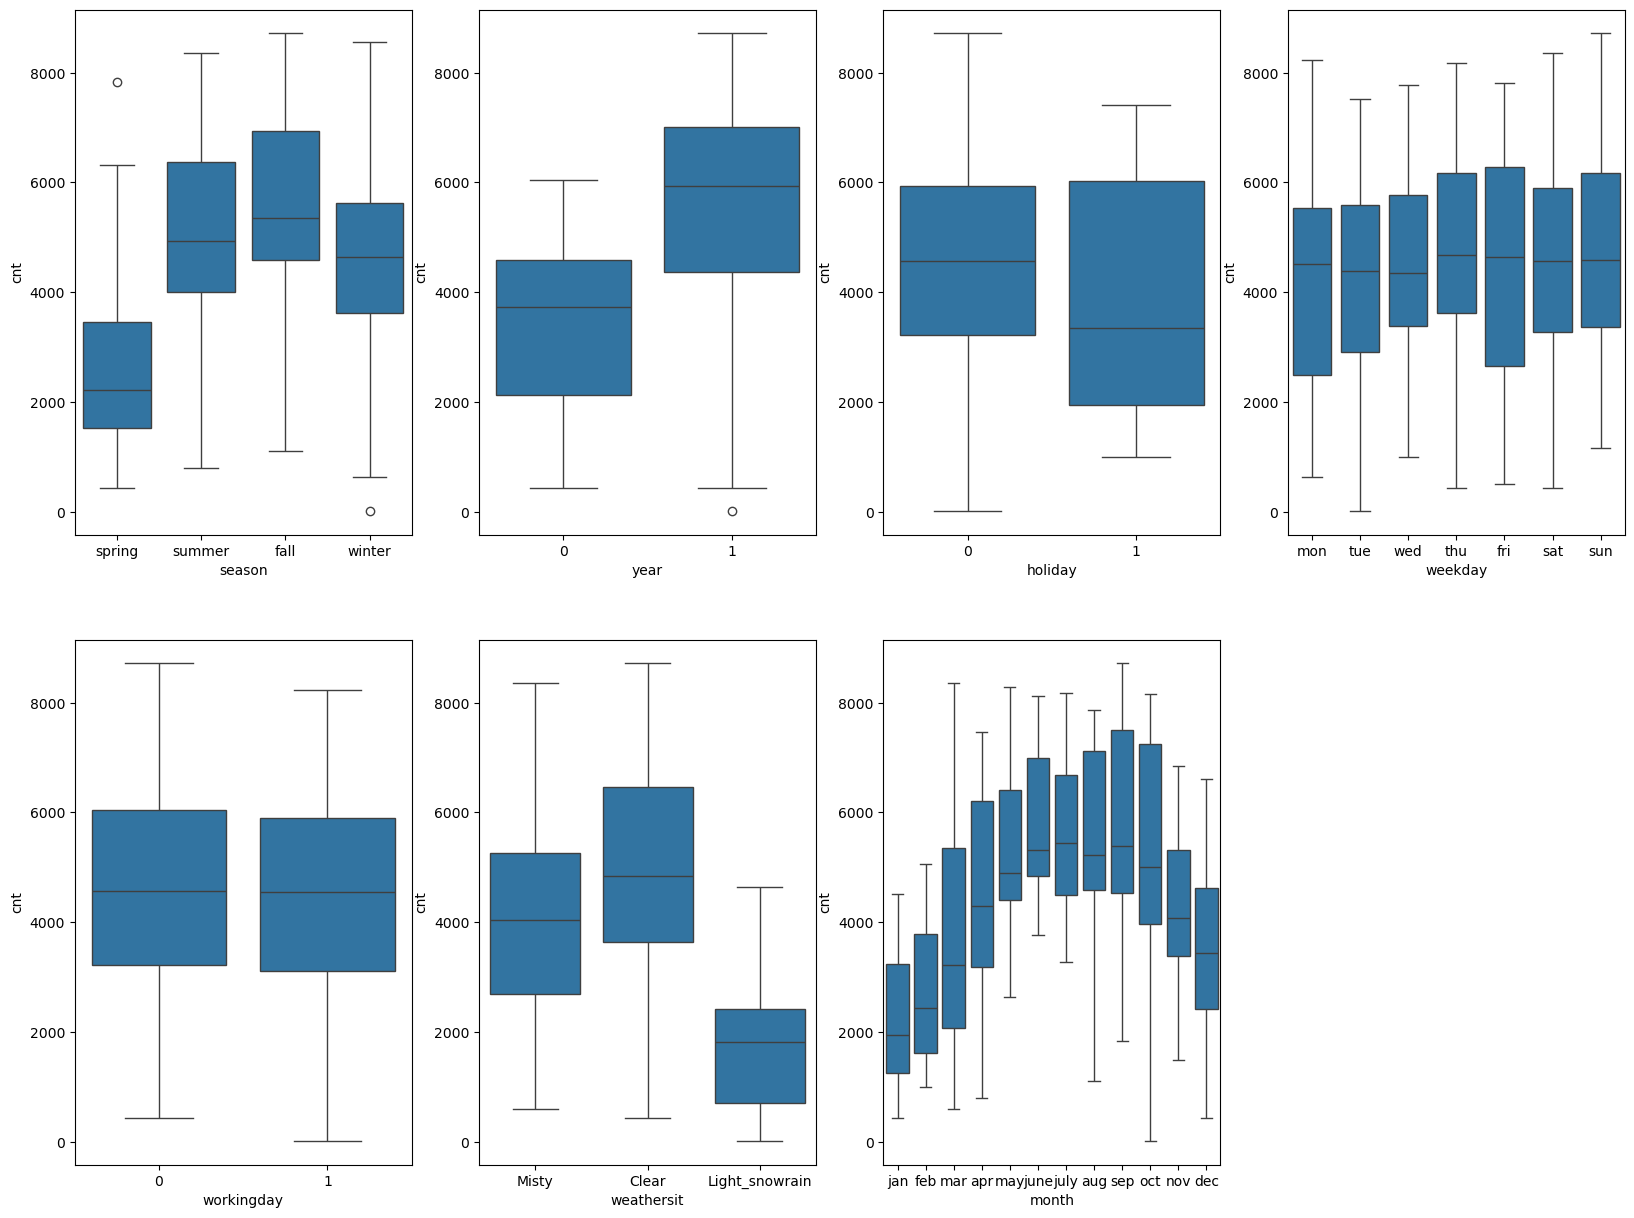

In [222]:
# Plotting box plot to know its relation between the categorical variables and target variable
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)

plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'cnt', data = bike_df)

plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)

plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)

plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)

plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)

plt.subplot(2,4,7)
sns.boxplot(x = 'month', y = 'cnt', data = bike_df)
plt.show()

* Season - Fall has highest demand whereas Spring as least
* Year 2019 has greater count
* People prefers Good weather
* Demand is constant throughout the week

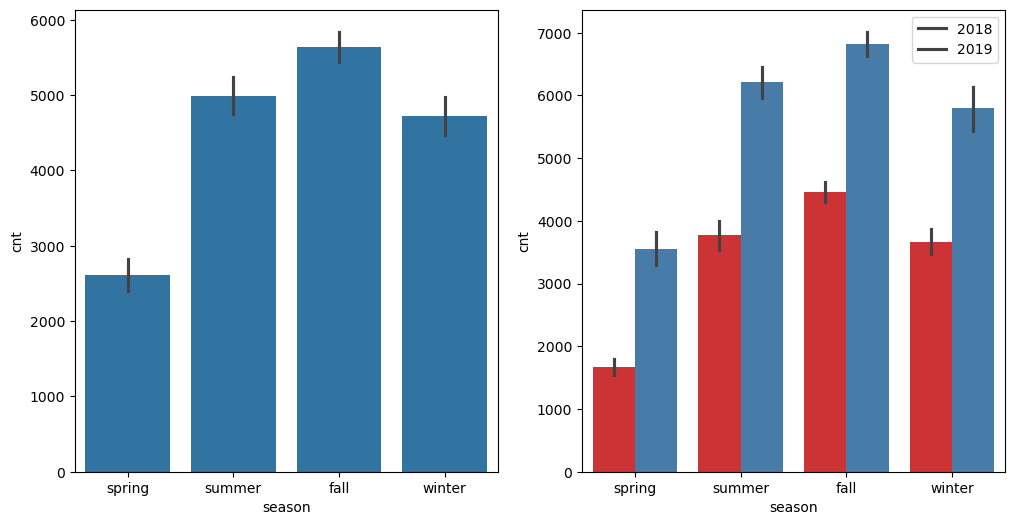

In [224]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='season',y='cnt',data=bike_df)
plt.subplot(1,2,2)
sns.barplot(x='season',y='cnt',data=bike_df, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

* Fall season has more demand when seeing the first graph. 
* From the second graph we could see that year 2019 has drastci increase in demand in all the seasons

#### Creating dummy variables

In [227]:
# Create dummy variables for the below columns to make the analysis easier and concat it to new dataframe

months_df=pd.get_dummies(bike_df.month,drop_first=True)
weekdays_df=pd.get_dummies(bike_df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_df.season,drop_first=True)
bike_new = pd.concat([bike_df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [228]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,False,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,False,False,False,True,False,False,True,True,False,False
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,True,False,False,True,False,False
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,False,False,True,False,False,False,False,True,False,False
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,False,False,False,True,False,False


In [229]:
# Since we have craeted dummy variable, we will drop the original column
bike_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

bike_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,False,False,...,False,False,False,False,False,False,True,True,False,False
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,False,False,True,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,True,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,True,False,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,False,False,False,True,False,False


In [230]:
bike_new.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [231]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    bool   
 9   dec             730 non-null    bool   
 10  feb             730 non-null    bool   
 11  jan             730 non-null    bool   
 12  july            730 non-null    bool   
 13  june            730 non-null    bool   
 14  mar             730 non-null    bool   
 15  may             730 non-null    bool   
 16  nov             730 non-null    bool   
 17  oct             730 non-null    boo

## Building Model

### Splitting dataset into train and test dataset

In [234]:
bike_new.shape

(730, 30)

In [235]:
# Splitting the dataset into train and test with random state 100

from sklearn.model_selection import train_test_split
np.random.seed(0)
train, test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [236]:
train.shape

(510, 30)

In [237]:
test.shape

(220, 30)

### Rescaling the dataset

It is possible to see that ranges of few variables like cnt are very high comparing the other variables like temp, atemp etc. So this should be scaled to build a multiple linear regression model to get the valid results. This can be acheived by 2 methods mentioned below.
  * Min-Max scaling
  * Standardization methods

Min-Max Scaling method:

In [240]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [241]:
train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,...,False,False,False,False,True,False,False,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,False,False,...,False,True,False,False,False,False,True,True,False,False
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,False,True,...,False,False,False,False,False,False,False,True,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,False,...,False,True,False,False,False,False,True,False,True,False
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,False,False,...,False,True,False,False,False,False,True,False,True,False


In [242]:
# Scaling for numerical columns
num_vars = ['temp','atemp','humidity','windspeed','cnt']
train[num_vars] = scaler.fit_transform(train[num_vars])

In [243]:
train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,False,True,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,...,False,True,False,False,False,False,True,True,False,False
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,False,True,...,False,False,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,...,False,True,False,False,False,False,True,False,True,False
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,False,False,...,False,True,False,False,False,False,True,False,True,False


In [244]:
train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


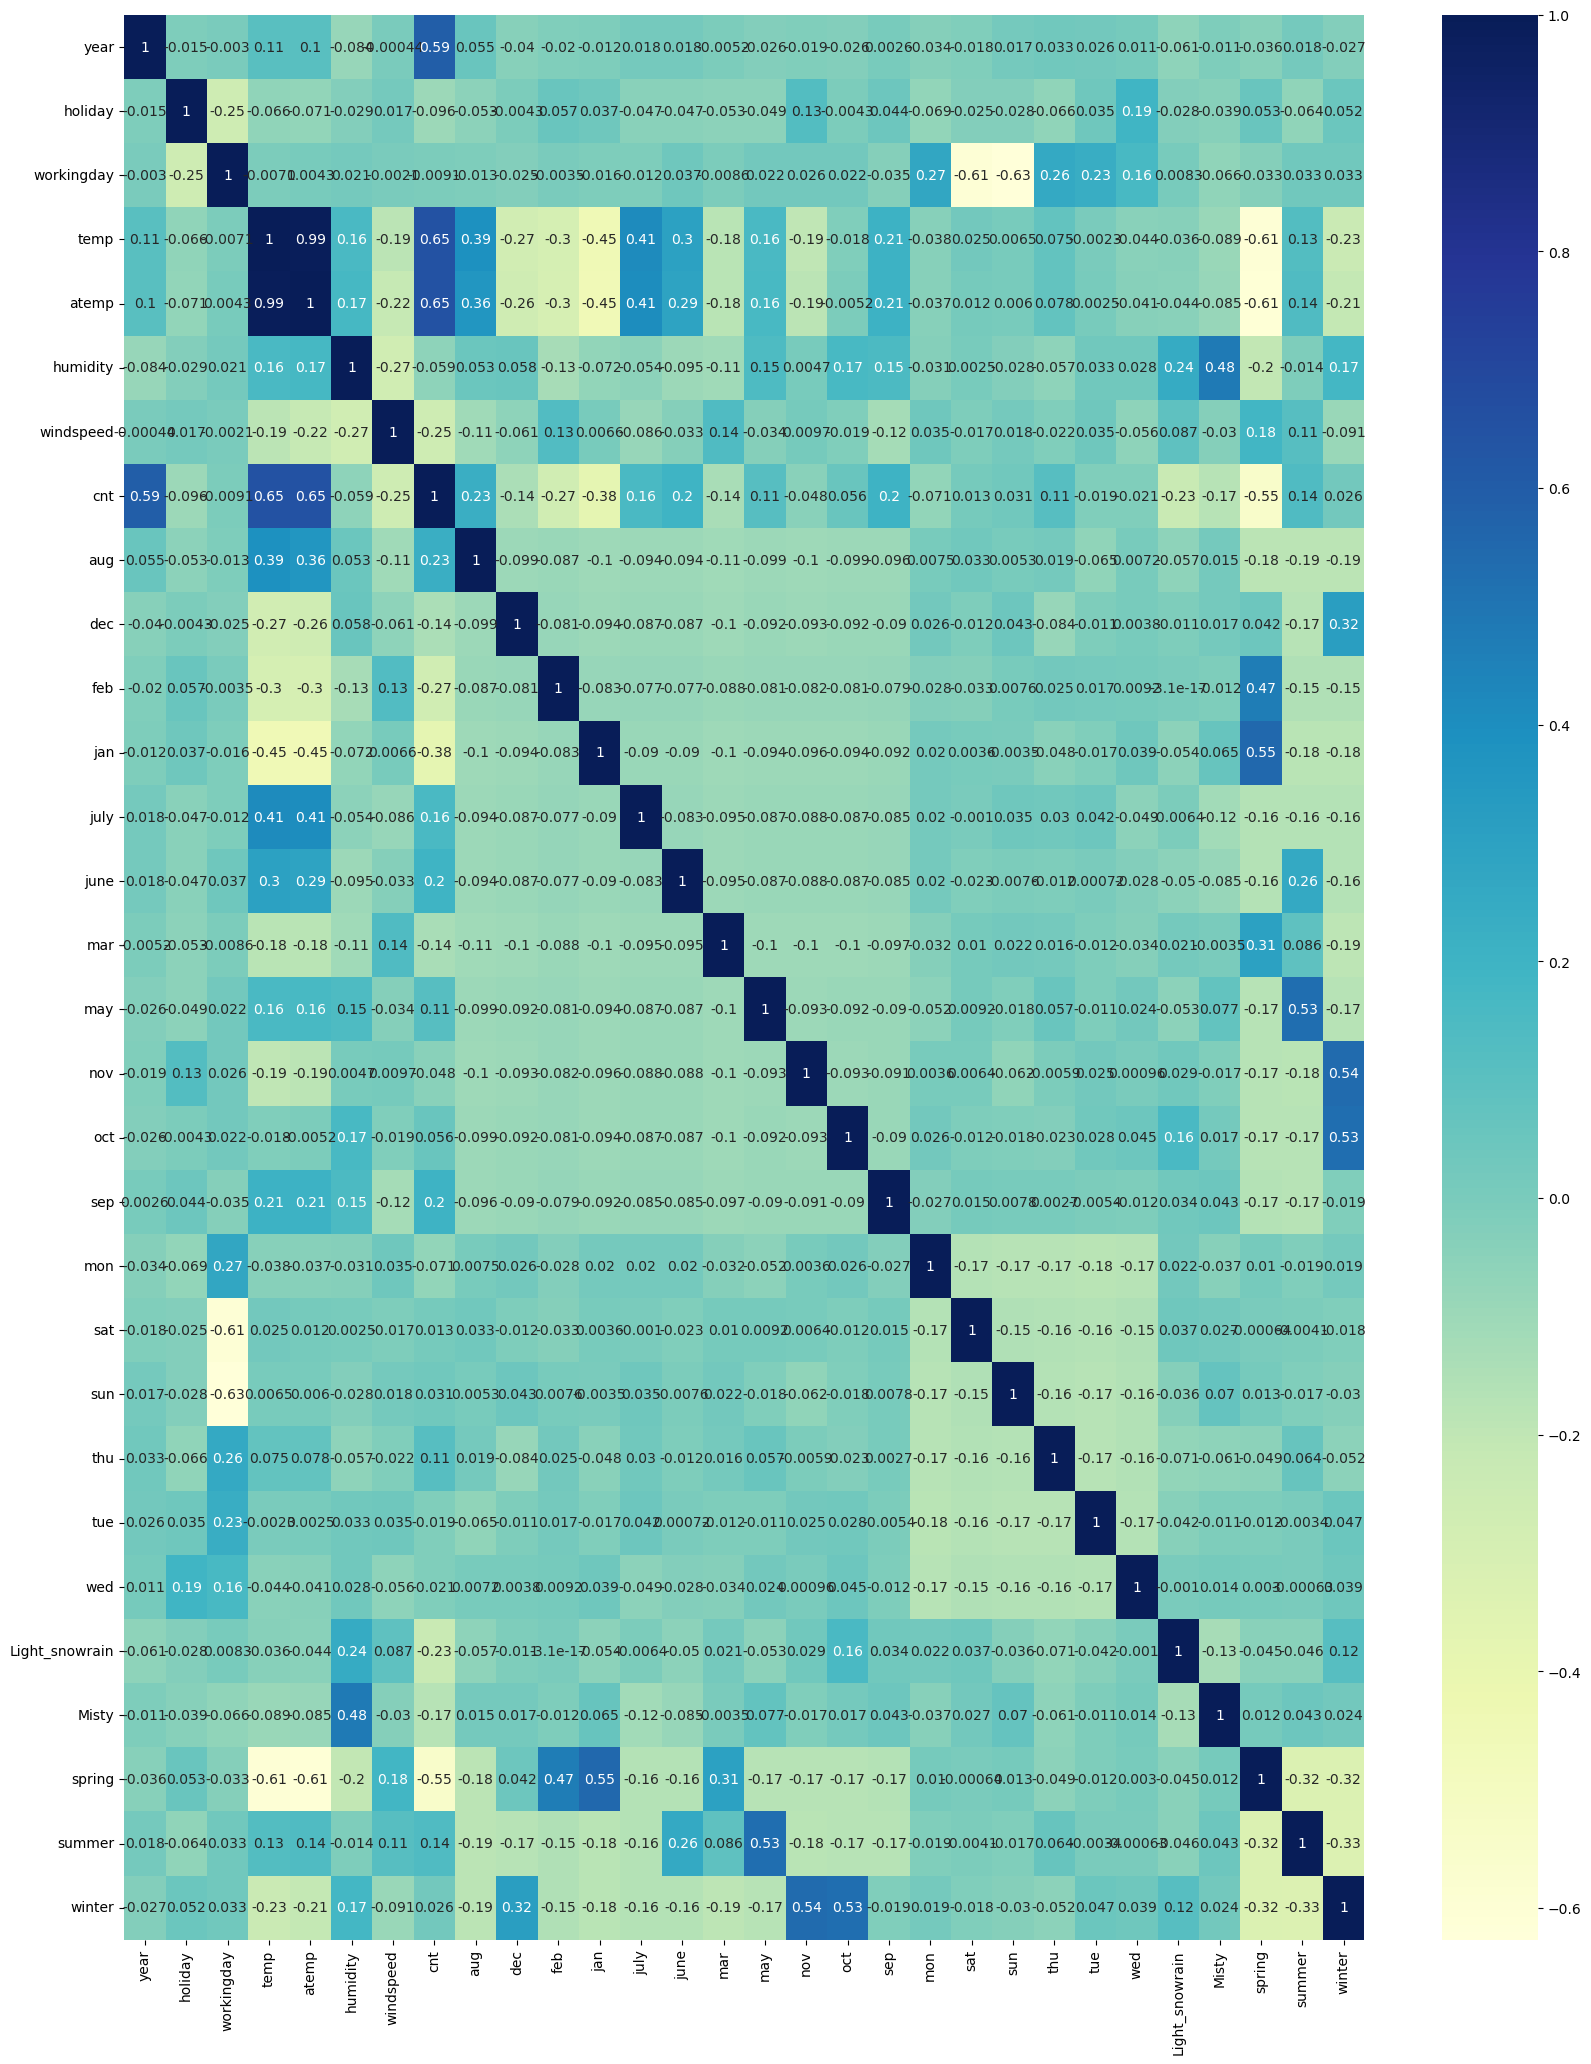

In [245]:
#Lets visualize the correlation coefficients to know which column is higly correlated
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

* From the plot we could see that year, temp, atemp columns are highly correlated with cnt variable

In [247]:
# Diving the train set into X and Y for model building
y_train = train.pop('cnt')
X_train = train

### Approach:
We will use mixed approach to filter out the signifacnt columns which will be helpful to bring out a good model.
  * Automated approch - RFE Method
  * Manual selection of columns

In [249]:
# RFE method - Recursive feature elimination
# Start with 15 variables
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [250]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [251]:
# Variables selected from RFE method
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [252]:
# these are the columns selected from RFE method
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [253]:
# Store it in a new variable with RFE selected columns
X_train_rfe = X_train[col]

## Building statsmodel

#### Caluculating VIF to check multicollinearity

In [256]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [257]:
# Defining a function to calculate VIF

def calculateVIF(df):
    df = df.copy()
    df = df.astype({col: 'int64' for col in df.select_dtypes(include=['bool']).columns})
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

#### MODEL 1

In [259]:
calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Misty,2.32
0,year,2.09
8,nov,1.85
6,jan,1.75


In [260]:
X_train_rfe = X_train_rfe.astype({col: 'int64' for col in X_train_rfe.select_dtypes(include=['bool']).columns})


In [261]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  

# Add a constant
X_train_rfe=sm.add_constant(X_train_rfe)

#Fitting a model - 1
lr_1 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          8.15e-189
Time:                        14:58:16   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [262]:
# Humidity shows higher VIF. Lets drop it and build the model again
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)


In [263]:
X_train_new=X_train_new.drop(['const'],axis=1)

#### MODEL 2

In [265]:
# Calculating VIF for filtered columns from previous model

calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,year,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
10,Misty,1.57


In [266]:
# Model 2 with filtered columns

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          4.75e-186
Time:                        14:58:16   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

In [267]:
# Dropping column - nov due to high p value

X_train_new = X_train_new.drop(['nov'], axis = 1)


#### MODEL 3

In [269]:
# Calculating VIF for filtered columns from previous model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,year,2.07
12,winter,2.05
5,jan,1.65
6,july,1.59
9,Misty,1.57
7,sep,1.34


In [270]:
# Model 3 with filtered columns

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          2.74e-186
Time:                        14:58:16   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

In [271]:
# Dropping column dec  as it has high p-value
X_train_new = X_train_new.drop(['dec'], axis = 1)

#### MODEL 4

In [273]:
# Calculating VIF for filtered columns from previous model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,year,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


In [274]:
# Model 4 with filtered columns

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          8.14e-187
Time:                        14:58:17   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

In [275]:
# Dropping column jan as it has high p-value

X_train_new = X_train_new.drop(['jan'], axis = 1)

#### MODEL 5

In [277]:
# Calculating VIF for filtered columns from previous model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,year,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


In [278]:
# Model 5 with filtered columns

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          5.06e-187
Time:                        14:58:17   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

In [279]:
# Dropping column jan as it has high p-value
    
X_train_new = X_train_new.drop(['july'], axis = 1)

#### MODEL 6

In [281]:
# Calculating VIF for filtered columns from previous model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


In [282]:
# Model 6 with filtered columns

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          1.47e-186
Time:                        14:58:17   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

## Residual Analysis of the train data and validation

In [284]:
# Making predictions for the train set with built model
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

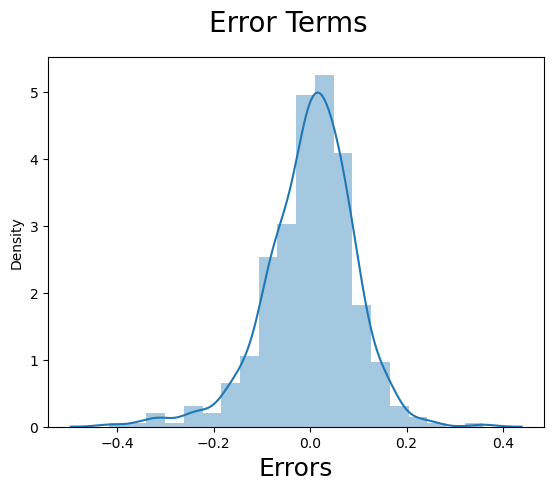

In [285]:
# Plotting dist plot for error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)   

* Graph comes out to be a normal distribution

### Making Predictions Using the Final Model

In [288]:
# Scaling the numerical columns
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
test[num_vars] = scaler.transform(test[num_vars])
test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,False,...,False,False,False,False,True,False,True,False,False,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,False,...,False,False,True,False,False,False,False,False,True,False
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,True,False,False,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,True,False,...,False,False,False,False,False,False,False,False,False,False
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,False,False,...,True,False,False,False,False,False,False,False,True,False


In [289]:
test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [290]:
# Splitting the test set into X and Y
y_test = test.pop('cnt')
X_test = test

In [291]:
# Taking only the columns we got from final model
col1 = X_train_new.columns

In [292]:
X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [293]:
# Making Predictions
y_pred = lr_6.predict(X_test_lm_6)

In [294]:
# Calculating R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

## OBSERVATION:

The observed R-squared value for the test set is 0.803, while for the training set it is 0.830. This near equality indicates that the model's performance is good

### Model Evaluation

Text(0, 0.5, 'y_pred')

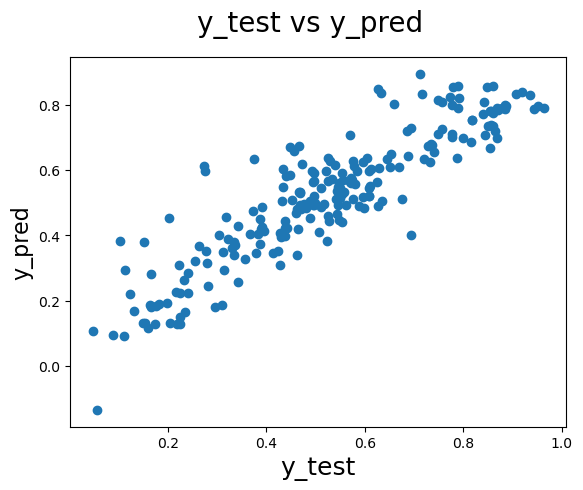

In [297]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [298]:
lr_6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
sep               0.090998
Light_snowrain   -0.285031
Misty            -0.078741
spring           -0.055406
summer            0.062076
winter            0.094476
dtype: float64

## Final conclusions to the company:

We can see that the equation of our best fitted line is:

𝑐𝑛𝑡=0.1909+0.2341×𝑦𝑒𝑎𝑟−0.0963×ℎ𝑜𝑙𝑖𝑑𝑎𝑦+0.4777×𝑡𝑒𝑚𝑝−0.1481×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑+0.0910×𝑠𝑒𝑝−0.2850×𝐿𝑖𝑔ℎ𝑡𝑠𝑛𝑜𝑤𝑟𝑎𝑖𝑛−0.0787
×𝑀𝑖𝑠𝑡𝑦−0.0554×𝑠𝑝𝑟𝑖𝑛𝑔+0.0621×𝑠𝑢𝑚𝑚𝑒𝑟+0.0945×𝑤𝑖𝑛𝑡𝑒𝑟

* Based on the R-Squared and adjusted R-Squared values for both the training and testing datasets, it can be concluded that the included variables are able to account for over 80% of the variation in bike demand.
* It is evident that the variables year,temp,sep,summer and winter shows a positve correlation and play a significant role in predicting the demand for shared bikes.
* holiday, windspeed, Light_snowrain, Misty, spring are negatively correlated which should be taken care.